In [121]:
import numpy as np
from scipy import optimize
import pandas as pd
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.special import gamma
from math import pi
import scipy.stats as si


In [122]:

# Function to calculate the Black-Scholes formula for European call option
def black_scholes_call(S, K, r, sigma, t, T):
    DT=T-t
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * DT) / (sigma * np.sqrt(DT))
    d2 = d1 - sigma * np.sqrt(DT)
    
    call_option_price = S * si.norm.cdf(d1, 0, 1) - K * np.exp(-r * DT) * si.norm.cdf(d2, 0, 1)
    return call_option_price

In [124]:
def necula_call(S,K,r,sigma,t,T,H):
    
    d1=((np.log(S / K)) + r * (T - t) + 0.5 * sigma ** 2 * (T ** (2 * H) - t ** (2 * H))) / (
            sigma * np.sqrt(T ** (2 * H) - t ** (2 * H)))
    d2=((np.log(S / K)) + r * (T - t) - 0.5 * sigma ** 2 * (T ** (2 * H) - t ** (2 * H))) / (
            sigma * np.sqrt(T ** (2 * H) - t ** (2 * H)))
    
    call_option_price = S * si.norm.cdf(d1, 0, 1) - K * np.exp(-r * (T - t)) * si.norm.cdf(d2, 0, 1)
    return(call_option_price)

In [125]:
def ro_h(H):
    if H!=0.5:
        return( (np.sin(pi*(H-0.5))/(pi*(H-0.5)))*((gamma(1.5-H)**2)/(gamma(2-2*H))) )
    return( (gamma(1.5-H)**2)/(gamma(2-2*H)))


def d1_rostek(S, K, r, sigma, t, T, H, roH):
    return(
       (np.log(S / K) + r * (T-t) + 0.5* roH * ((sigma )** 2 )* ((T-t)**(2*H)))/(np.sqrt(roH)*sigma*((T-t)**H))
    )

def d2_rostek(S, K, r, sigma, t, T, H, roH):
    return(
        d1_rostek(S, K, r, sigma, t, T, H, roH) - np.sqrt(roH)*sigma*((T-t)**H)
    )


def rostek_call(S, K, r, sigma, t, T, H):
    
    roH=ro_h(H)
    
    d1_term=S * norm.cdf(d1_rostek(S, K, r, sigma, t, T, H, roH))
    d2_term=K * np.exp(-r * (T - t)) * norm.cdf(d2_rostek(S, K, r, sigma, t, T, H, roH))
    return (d1_term - d2_term)


    

In [126]:
# Parameters
S0_range = np.linspace(80, 120, 100)  # Initial price of the underlying asset
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility
t= 0  #Current Date
T = 0.25  #Maturity Date


Text(0, 0.5, 'Option Price')

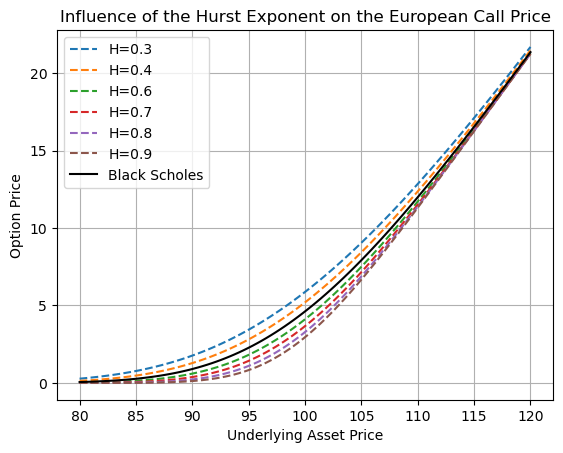

In [127]:
Hl=[0.3, 0.4,0.6,0.7,0.8,0.9]
BS_option_prices=[black_scholes_call(S0, K, r, sigma, t,T) for S0 in S0_range]
for H in Hl:
    NEC_option_prices=[necula_call(S0, K, r, sigma, t,T, H) for S0 in S0_range]
    plt.plot(S0_range,NEC_option_prices,'--',label='H='+str(H))
plt.plot(S0_range,BS_option_prices,label='Black Scholes',color='black')
plt.legend()
plt.grid()
plt.title('Influence of the Hurst Exponent on the European Call Price')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Option Price')
#plt.savefig('call_price_H.png')


Text(0, 0.5, 'Option Price')

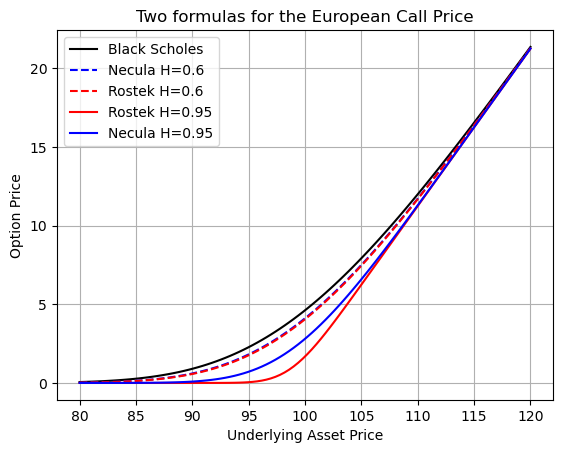

In [19]:
H=0.6
ROS_option_prices=[rostek_call(S0, K, r, sigma, t, T, H) for S0 in S0_range]
NEC_option_prices=[necula_call(S0, K, r, sigma, t, T, H) for S0 in S0_range]

plt.plot(S0_range,BS_option_prices,label='Black Scholes',color='black')
plt.plot(S0_range,NEC_option_prices,'--', color='blue',label='Necula H='+str(H))
plt.plot(S0_range,ROS_option_prices,'--',color='red',label='Rostek H='+str(H))

H=0.95
ROS_option_prices=[rostek_call(S0, K, r, sigma, t, T, H) for S0 in S0_range]
NEC_option_prices=[necula_call(S0, K, r, sigma, t, T, H) for S0 in S0_range]

plt.plot(S0_range,ROS_option_prices,color='red',label='Rostek H='+str(H))
plt.plot(S0_range,NEC_option_prices, color='blue',label='Necula H='+str(H))

plt.legend()
plt.grid()
plt.title('Two formulas for the European Call Price')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Option Price')
#plt.savefig('nec_ros.png')


/var/folders/k9/dxv361v960vf9vbs06s2wdp80000gn/T/ipykernel_93781/3126785882.py:8: RuntimeWarning: divide by zero encountered in log
  mu=-np.log(emu)


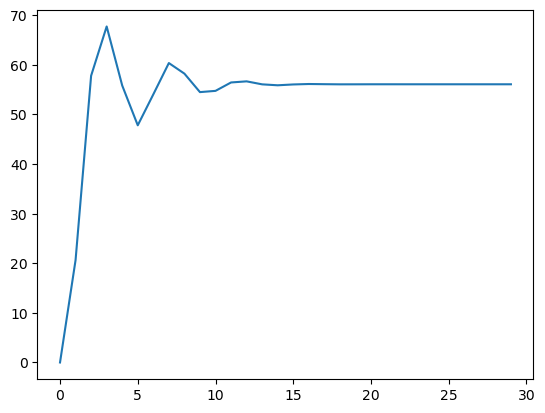

In [20]:
def grey_call_price(beta,S0,K,r,sigma,tau,Ns,Nmu):

    mu1=-sigma**2/2
    
    emu=0
    for n in range(Nmu):
        emu+= (-1)**n * gamma(1+2*n)*mu1**n / ( np.math.factorial(n)* gamma(1+2*beta*n)   )
    mu=-np.log(emu)

    x=np.log(S0/K) + r*tau


    c=-mu*tau**beta
    s=0

    for n in range (Ns+1):
        for m in range (1,Ns+1):
            s+= ((-1)**n)   *((-x-mu*tau)**n) * (c**((m-n)/2)) /  (np.math.factorial(n)* gamma(1-beta*((n-m)/2)))

    return(s*K*np.exp(-r*tau)/2 )

beta=0.9
S0=150
K=100
r=0.05
sigma=0.25
tau = 0.25

C=[ grey_call_price(beta,S0,K,r,sigma,tau,Ns=k,Nmu=k) for k in range (30)]

plt.plot(C)

In [21]:
Grey_option_prices=[grey_call_price(beta, S0, K, r, sigma, tau,Ns=20,Nmu=20) for S0 in S0_range]

Text(0, 0.5, 'Option Price')

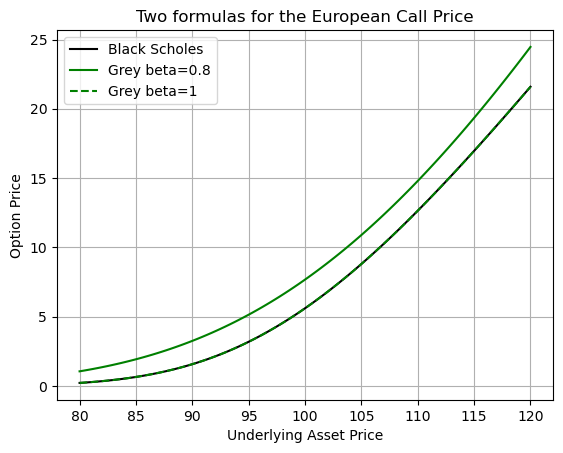

In [22]:
beta=0.8
Grey_option_prices=[grey_call_price(beta, S0, K, r, sigma, tau,Ns=20,Nmu=20) for S0 in S0_range]
BS_option_prices=[black_scholes_call(S0, K, r, sigma, t,T) for S0 in S0_range]

plt.plot(S0_range,BS_option_prices,label='Black Scholes',color='black')
plt.plot(S0_range,Grey_option_prices,color='green',label='Grey beta='+str(beta))

beta=1
Grey_option_prices=[grey_call_price(beta, S0, K, r, sigma, tau,Ns=20,Nmu=20) for S0 in S0_range]

plt.plot(S0_range,Grey_option_prices,'--',color='green',label='Grey beta='+str(beta))


plt.legend()
plt.grid()
plt.title('Two formulas for the European Call Price')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Option Price')

Text(0, 0.5, 'Option Price')

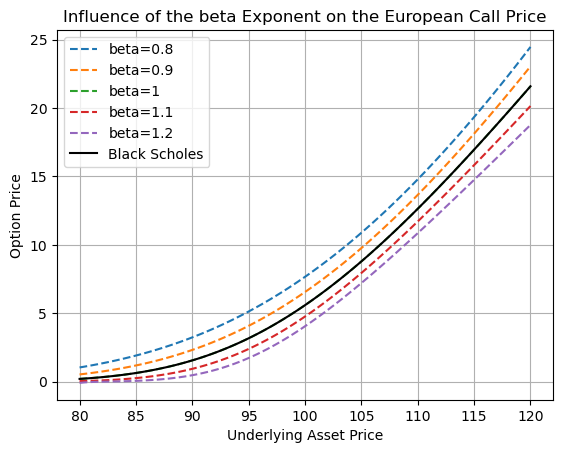

In [26]:
betal=[0.8,0.9,1,1.1, 1.2]
BS_option_prices=[black_scholes_call(S0, K, r, sigma, t,T) for S0 in S0_range]
for beta in betal:
    Grey_option_prices=[grey_call_price(beta, S0, K, r, sigma, tau,Ns=20,Nmu=20) for S0 in S0_range]
    plt.plot(S0_range,Grey_option_prices,'--',label='beta='+str(beta))
plt.plot(S0_range,BS_option_prices,label='Black Scholes',color='black')
plt.legend()
plt.grid()
plt.title('Influence of the beta Exponent on the European Call Price')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Option Price')

Text(0, 0.5, 'Option Price')

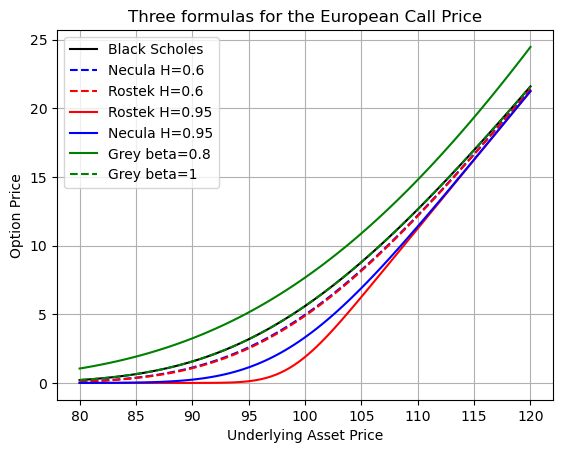

In [24]:
H=0.6
ROS_option_prices=[rostek_call(S0, K, r, sigma, t, T, H) for S0 in S0_range]
NEC_option_prices=[necula_call(S0, K, r, sigma, t, T, H) for S0 in S0_range]

plt.plot(S0_range,BS_option_prices,label='Black Scholes',color='black')
plt.plot(S0_range,NEC_option_prices,'--', color='blue',label='Necula H='+str(H))
plt.plot(S0_range,ROS_option_prices,'--',color='red',label='Rostek H='+str(H))

H=0.95
ROS_option_prices=[rostek_call(S0, K, r, sigma, t, T, H) for S0 in S0_range]
NEC_option_prices=[necula_call(S0, K, r, sigma, t, T, H) for S0 in S0_range]

plt.plot(S0_range,ROS_option_prices,color='red',label='Rostek H='+str(H))
plt.plot(S0_range,NEC_option_prices, color='blue',label='Necula H='+str(H))

beta=0.8
Grey_option_prices=[grey_call_price(beta, S0, K, r, sigma, tau,Ns=20,Nmu=20) for S0 in S0_range]

plt.plot(S0_range,Grey_option_prices,color='green',label='Grey beta='+str(beta))

beta=1
Grey_option_prices=[grey_call_price(beta, S0, K, r, sigma, tau,Ns=20,Nmu=20) for S0 in S0_range]

plt.plot(S0_range,Grey_option_prices,'--',color='green',label='Grey beta='+str(beta))

plt.legend()
plt.grid()
plt.title('Three formulas for the European Call Price')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Option Price')

pas encore codée en lib a aprtir de la 


In [ ]:
#### 

In [59]:
from scipy.stats import norm
from scipy.integrate import quad
import numpy as np
from mpmath import invertlaplace, exp

def m_wright(nu, x):
    if x ==0:
        return 0
    
    fp = lambda p: exp(-p ** nu)
    r = (1 / x) ** (1 / nu)

    Mnu = float(invertlaplace(fp, r)) * (r ** (nu + 1)) / nu
    return Mnu

def Xdensity(x, beta, omega, t):
    d = np.sqrt(-omega) * t ** (beta / 2)
    if d != 0:
        return (0.5 / d) * m_wright(beta / 2, abs(x) / d)
    else:
        return None
    
def get_omega(sigma, beta): # order 4 approximation
    if beta >= -0.5:
        return - (sigma**2) / gamma(1+ 2*beta)
    else:
        return 0

def grey_call_price_integral(S, K, r, mu, T, beta, sigma):
    omega = get_omega(sigma, beta)
    def integrand(y):
        return max(S * np.exp((r + mu) * T + y) - K, 0) * Xdensity(y, beta, omega, T)

    # Perform numerical integration
    integral, _ = quad(integrand, -np.inf, np.inf, epsabs=1e-5, epsrel=1e-5)
    price = np.exp(-r * T) * integral
    return price

S = 100  
K = 150  
r = 0.05  
mu = 0.1 
T = 1    
beta = 0.9 
sigma = 0.4

grey_call_price_integral(S, K, r, mu, T, beta, sigma)


/var/folders/k9/dxv361v960vf9vbs06s2wdp80000gn/T/ipykernel_93781/776186737.py:32: RuntimeWarning: overflow encountered in exp
  return max(S * np.exp((r + mu) * T + y) - K, 0) * Xdensity(y, beta, omega, T)
/var/folders/k9/dxv361v960vf9vbs06s2wdp80000gn/T/ipykernel_93781/776186737.py:32: RuntimeWarning: invalid value encountered in scalar multiply
  return max(S * np.exp((r + mu) * T + y) - K, 0) * Xdensity(y, beta, omega, T)
/var/folders/k9/dxv361v960vf9vbs06s2wdp80000gn/T/ipykernel_93781/776186737.py:35: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = quad(integrand, -np.inf, np.inf, epsabs=1e-5, epsrel=1e-5)


nan

In [66]:
from scipy.stats import norm
from scipy.integrate import quad
import numpy as np
from mpmath import invertlaplace, exp

def m_wright(nu, x):
    if x == 0:
        return 0
    fp = lambda p: exp(-p ** nu)
    r = (1 / x) ** (1 / nu)

    Mnu = float(invertlaplace(fp, r)) * (r ** (nu + 1)) / nu
    return Mnu

def Xdensity(x, beta, omega, t):
    d = np.sqrt(-omega) * t ** (beta / 2)
    if d != 0:
        return (0.5 / d) * m_wright(beta / 2, abs(x) / d)
    else:
        return None
    
def get_omega(sigma, beta): # order 4 approximation
    if beta >= -0.5:
        return - (sigma**2) / gamma(1+ 2*beta)
    else:
        return 0

def grey_call_price_integral(S, K, r, mu, T, beta, sigma, N):
    min_y = -10000
    max_y = 10000
    dy = (max_y - min_y)/N
    omega = get_omega(sigma, beta)
    s = 0
    for y in np.arange(min_y, max_y,dy):
        s += max(S * np.exp((r + mu) * T + y) - K, 0) * Xdensity(y, beta, omega, T)
        print(s, Xdensity(y, beta, omega, T), y)

    price = np.exp(-r * T) * s
    return price

S = 100  
K = 150  
r = 0.05  
mu = 0.1 
T = 1   
N = 1000
beta = 0.9 
sigma = 0.4

grey_call_price_integral(S, K, r, mu, T, beta, sigma, N)


0.0
0.0
0.0 0.0 -10000.0
0.0
0.0
0.0 0.0 -9980.0
0.0
0.0
0.0 0.0 -9960.0
0.0
0.0
0.0 0.0 -9940.0
0.0
0.0
0.0 0.0 -9920.0
0.0
0.0
0.0 0.0 -9900.0
0.0
0.0
0.0 0.0 -9880.0
0.0
0.0
0.0 0.0 -9860.0
0.0
0.0
0.0 0.0 -9840.0
0.0
0.0
0.0 0.0 -9820.0
0.0
0.0
0.0 0.0 -9800.0
0.0
0.0
0.0 0.0 -9780.0
0.0
0.0
0.0 0.0 -9760.0
0.0
0.0
0.0 0.0 -9740.0
0.0
0.0
0.0 0.0 -9720.0
0.0
0.0
0.0 0.0 -9700.0
0.0
0.0
0.0 0.0 -9680.0
0.0
0.0
0.0 0.0 -9660.0
0.0
0.0
0.0 0.0 -9640.0
0.0
0.0
0.0 0.0 -9620.0
0.0
0.0
0.0 0.0 -9600.0
0.0
0.0
0.0 0.0 -9580.0
0.0
0.0
0.0 0.0 -9560.0
0.0
0.0
0.0 0.0 -9540.0
0.0
0.0
0.0 0.0 -9520.0
0.0
0.0
0.0 0.0 -9500.0
0.0
0.0
0.0 0.0 -9480.0
0.0
0.0
0.0 0.0 -9460.0
0.0
0.0
0.0 0.0 -9440.0
0.0
0.0
0.0 0.0 -9420.0
0.0
0.0
0.0 0.0 -9400.0
0.0
0.0
0.0 0.0 -9380.0
0.0
0.0
0.0 0.0 -9360.0
0.0
0.0
0.0 0.0 -9340.0
0.0
0.0
0.0 0.0 -9320.0
0.0
0.0
0.0 0.0 -9300.0
0.0
0.0
0.0 0.0 -9280.0
0.0
0.0
0.0 0.0 -9260.0
0.0
0.0
0.0 0.0 -9240.0
0.0
0.0
0.0 0.0 -9220.0
0.0
0.0
0.0 0.0 -9200.0
0.0
0.0
0.0 0.0

0.0
0.0 0.0 -1200.0
0.0
0.0
0.0 0.0 -1180.0
0.0
0.0
0.0 0.0 -1160.0
0.0
0.0
0.0 0.0 -1140.0
0.0
0.0
0.0 0.0 -1120.0
0.0
0.0
0.0 0.0 -1100.0
0.0
0.0
0.0 0.0 -1080.0
0.0
0.0
0.0 0.0 -1060.0
0.0
0.0
0.0 0.0 -1040.0
0.0
0.0
0.0 0.0 -1020.0
0.0
0.0
0.0 0.0 -1000.0
0.0
0.0
0.0 0.0 -980.0
0.0
0.0
0.0 0.0 -960.0
0.0
0.0
0.0 0.0 -940.0
0.0
0.0
0.0 0.0 -920.0
0.0
0.0
0.0 0.0 -900.0
0.0
0.0
0.0 0.0 -880.0
0.0
0.0
0.0 0.0 -860.0
0.0
0.0
0.0 0.0 -840.0
0.0
0.0
0.0 0.0 -820.0
0.0
0.0
0.0 0.0 -800.0
0.0
0.0
0.0 0.0 -780.0
0.0
0.0
0.0 0.0 -760.0
0.0
0.0
0.0 0.0 -740.0
0.0
0.0
0.0 0.0 -720.0
0.0
0.0
0.0 0.0 -700.0
0.0
0.0
0.0 0.0 -680.0
0.0
0.0
0.0 0.0 -660.0
0.0
0.0
0.0 0.0 -640.0
0.0
0.0
0.0 0.0 -620.0
0.0
0.0
0.0 0.0 -600.0
0.0
0.0
0.0 0.0 -580.0
0.0
0.0
0.0 0.0 -560.0
0.0
0.0
0.0 0.0 -540.0
0.0
0.0
0.0 0.0 -520.0
0.0
0.0
0.0 0.0 -500.0
0.0
0.0
0.0 0.0 -480.0
0.0
0.0
0.0 0.0 -460.0
0.0
0.0
0.0 0.0 -440.0
0.0
0.0
0.0 0.0 -420.0
0.0
0.0
0.0 0.0 -400.0
0.0
0.0
0.0 0.0 -380.0
0.0
0.0
0.0 0.0 -360.0
0.0


/var/folders/k9/dxv361v960vf9vbs06s2wdp80000gn/T/ipykernel_93781/1218412939.py:36: RuntimeWarning: overflow encountered in exp
  s += max(S * np.exp((r + mu) * T + y) - K, 0) * Xdensity(y, beta, omega, T)
/var/folders/k9/dxv361v960vf9vbs06s2wdp80000gn/T/ipykernel_93781/1218412939.py:36: RuntimeWarning: invalid value encountered in scalar multiply
  s += max(S * np.exp((r + mu) * T + y) - K, 0) * Xdensity(y, beta, omega, T)


0.0
0.0
nan 0.0 1720.0
0.0
0.0
nan 0.0 1740.0
0.0
0.0
nan 0.0 1760.0
0.0
0.0
nan 0.0 1780.0
0.0
0.0
nan 0.0 1800.0
0.0
0.0
nan 0.0 1820.0
0.0
0.0
nan 0.0 1840.0
0.0
0.0
nan 0.0 1860.0
0.0
0.0
nan 0.0 1880.0
0.0
0.0
nan 0.0 1900.0
0.0
0.0
nan 0.0 1920.0
0.0
0.0
nan 0.0 1940.0
0.0
0.0
nan 0.0 1960.0
0.0
0.0
nan 0.0 1980.0
0.0
0.0
nan 0.0 2000.0
0.0
0.0
nan 0.0 2020.0
0.0
0.0
nan 0.0 2040.0
0.0
0.0
nan 0.0 2060.0
0.0
0.0
nan 0.0 2080.0
0.0
0.0
nan 0.0 2100.0
0.0
0.0
nan 0.0 2120.0
0.0
0.0
nan 0.0 2140.0
0.0
0.0
nan 0.0 2160.0
0.0
0.0
nan 0.0 2180.0
0.0
0.0
nan 0.0 2200.0
0.0
0.0
nan 0.0 2220.0
0.0
0.0
nan 0.0 2240.0
0.0
0.0
nan 0.0 2260.0
0.0
0.0
nan 0.0 2280.0
0.0
0.0
nan 0.0 2300.0
0.0
0.0
nan 0.0 2320.0
0.0
0.0
nan 0.0 2340.0
0.0
0.0
nan 0.0 2360.0
0.0
0.0
nan 0.0 2380.0
0.0
0.0
nan 0.0 2400.0
0.0
0.0
nan 0.0 2420.0
0.0
0.0
nan 0.0 2440.0
0.0
0.0
nan 0.0 2460.0
0.0
0.0
nan 0.0 2480.0
0.0
0.0
nan 0.0 2500.0
0.0
0.0
nan 0.0 2520.0
0.0
0.0
nan 0.0 2540.0
0.0
0.0
nan 0.0 2560.0
0.0
0.0
nan

nan

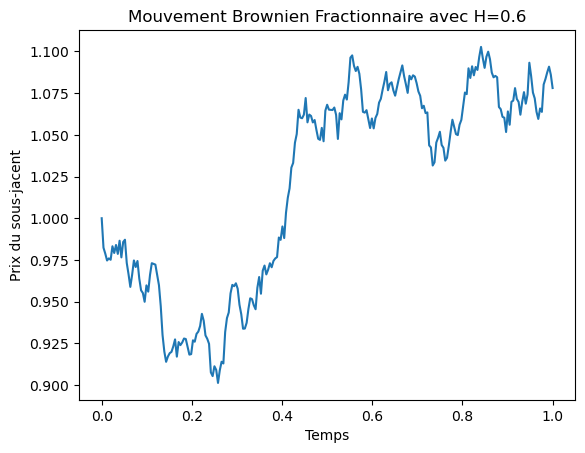

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from fbm import FBM

H = 0.6
T = 1.0  
n = 252 
S0 = 100  
K = 105  
r = 0.05
sigma = 0.2
t=0


def evol_va(r,sigma_a,fbm_sample,times,H):
    VA=np.exp( r*times - ((sigma_a**2)/2)*(times**(2*H)) + sigma_a*fbm_sample)
    return(VA)

f = FBM(n, hurst=H, length=T, method='daviesharte')
fbm_sample = f.fbm()
times = f.times()
VA=evol_va(r,sigma,fbm_sample,times,H)

plt.plot(times, VA)
plt.title("Mouvement Brownien Fractionnaire avec H=0.6")
plt.xlabel("Temps")
plt.ylabel("Prix du sous-jacent")
plt.show()

In [98]:
def call_fbm_MC(S0, K, r, sigma, T, H, n):
    num_simulations = 1000
    payoffs = []

    for _ in range(num_simulations):
        f = FBM(n, hurst=H, length=T, method='daviesharte')
        fbm_sample = f.fbm()
        times = f.times()

        ST = S0 * evol_va(r,sigma,fbm_sample,times,H)[-1]

        payoff = max(ST - K, 0)

        payoffs.append(payoff)

    option_price = np.exp(-r * T) * np.mean(payoffs)
    return option_price

option_price = call_fbm_MC(S0, K, r, sigma, T, H, n)

print("Prix de l'option (Monte Carlo) :", option_price)

Prix de l'option (Monte Carlo) : 8.380457837849088


In [99]:
print("Rostek call", rostek_call(S0, K, r, sigma, t, T, H))
print("Necula call", necula_call(S0, K, r, sigma, t, T, H))

Rostek call 7.8805400661166445
Necula call 8.021352235143176


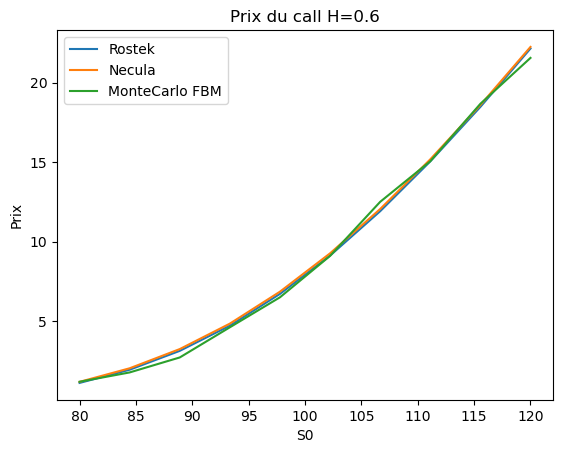

In [100]:
S0_range = np.linspace(80, 120, 10)

ROS_option_prices=[rostek_call(S0, K, r, sigma, t, T, H) for S0 in S0_range]
NEC_option_prices=[necula_call(S0, K, r, sigma, t, T, H) for S0 in S0_range]
MC_option_prices=[call_fbm_MC(S0, K, r, sigma, T, H, n) for S0 in S0_range]

plt.title(f"Prix du call H={H}")
plt.plot(S0_range, ROS_option_prices, label="Rostek")
plt.plot(S0_range, NEC_option_prices, label="Necula")
plt.plot(S0_range, MC_option_prices, label="MonteCarlo FBM")
plt.xlabel("S0")
plt.ylabel("Prix")
plt.legend()

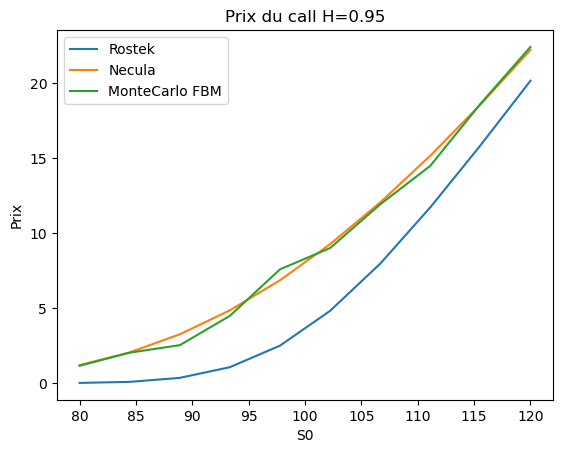

In [101]:
H = 0.95

ROS_option_prices=[rostek_call(S0, K, r, sigma, t, T, H) for S0 in S0_range]
NEC_option_prices=[necula_call(S0, K, r, sigma, t, T, H) for S0 in S0_range]
MC_option_prices=[call_fbm_MC(S0, K, r, sigma, T, H, n) for S0 in S0_range]

plt.title(f"Prix du call H={H}")
plt.plot(S0_range, ROS_option_prices, label="Rostek")
plt.plot(S0_range, NEC_option_prices, label="Necula")
plt.plot(S0_range, MC_option_prices, label="MonteCarlo FBM")
plt.xlabel("S0")
plt.ylabel("Prix")
plt.legend()

In [129]:
# Valeurs fictives

sigma_A = 0.5
t=1
T=2
rf = 0
mu = 0
company_debt = 5000
VA = 10000
H = 0.6

In [131]:
# NECULA

def d1(x, sigma_A, t, T, H, mu):
    return (np.log(x / company_debt) + mu * (T - t) + 0.5 * sigma_A ** 2 * (T ** (2 * H) - t ** (2 * H))) / (
            sigma_A * np.sqrt(T ** (2 * H) - t ** (2 * H)))

def d2(x, sigma_A, t, T, H, mu):
    return (np.log(x / company_debt) + mu * (T - t) - 0.5 * sigma_A ** 2 * (T ** (2 * H) - t ** (2 * H))) / (
            sigma_A * np.sqrt(T ** (2 * H) - t ** (2 * H)))

def proba_necula(VA, sigma_A, t, T, H, mu):
    distance_to_default = d2(VA, sigma_A, t, T, H, mu)
    default_probability = (1 - norm.cdf(distance_to_default)) * 100
    return default_probability

default_probability = proba_necula(VA, sigma_A, t, t + T, H, mu)

print(default_probability)

33.56703113710623


In [132]:
# ROSTEK

def ro_h(H):
    if H != 0.5:
        return ((np.sin(pi * (H - 0.5)) / (pi * (H - 0.5))) * ((gamma(1.5 - H) ** 2) / (gamma(2 - 2 * H))))
    return ((gamma(1.5 - H) ** 2) / (gamma(2 - 2 * H)))

def d1_r(x, sigma_A, t, T, H, mu):
    roH = ro_h(H)
    return (((np.log(x / company_debt)) + mu * (T - t) + 0.5 * roH * (sigma_A ** 2) * (
                (T - t) ** (2 * H))) / (np.sqrt(roH) * sigma_A * ((T - t) ** H)))

def d2_r(x, sigma_A, t, T, H, mu):
    roH = ro_h(H)
    return d1(x, sigma_A, t, T, H, mu) - np.sqrt(roH) * sigma_A * ((T - t) ** H)

def proba_rostek(VA, sigma_A, t, T, H, mu):
    
    distance_to_default = d2_r(VA, sigma_A, t, T, H, mu)
    default_probability = (1 - norm.cdf(distance_to_default)) * 100
    return default_probability

default_probability = proba_rostek(VA, sigma_A, t, t + T, H, mu)

print(default_probability)

30.603433950987746


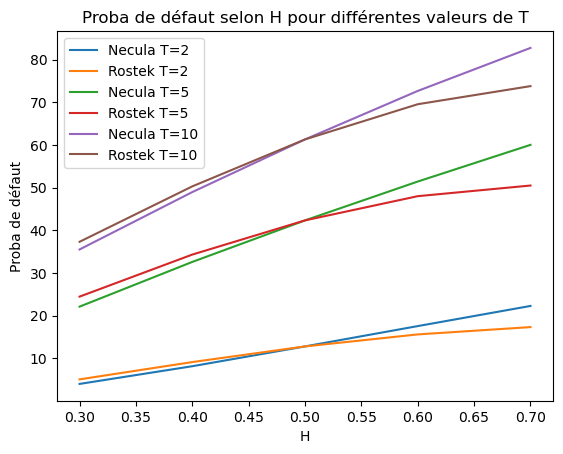

In [136]:
H_range = [0.3, 0.4, 0.5, 0.6, 0.7]

plt.title("Proba de défaut selon H pour différentes valeurs de T")

T = 2
probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for H in H_range]
probas_rostek = [proba_rostek(VA, sigma_A, t, T, H, mu) for H in H_range]

plt.plot(H_range, probas_necula, label=f"Necula T={T}")
plt.plot(H_range, probas_rostek, label=f"Rostek T={T}")

T = 5

probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for H in H_range]
probas_rostek = [proba_rostek(VA, sigma_A, t, T, H, mu) for H in H_range]


plt.plot(H_range, probas_necula, label=f"Necula T={T}")
plt.plot(H_range, probas_rostek, label=f"Rostek T={T}")

T = 10

probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for H in H_range]
probas_rostek = [proba_rostek(VA, sigma_A, t, T, H, mu) for H in H_range]

plt.plot(H_range, probas_necula, label=f"Necula T={T}")
plt.plot(H_range, probas_rostek, label=f"Rostek T={T}")

plt.xlabel("H")
plt.ylabel("Proba de défaut")
plt.legend()

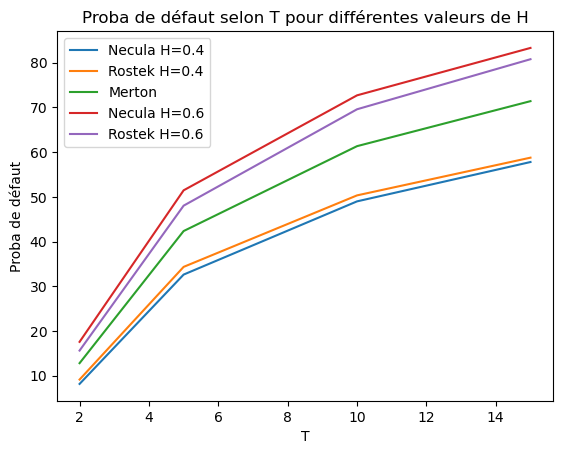

In [138]:
T_range = [2, 5, 10, 15]

plt.title("Proba de défaut selon T pour différentes valeurs de H")
H = 0.4

probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for T in T_range]
probas_rostek = [proba_rostek(VA, sigma_A, t, T, H, mu) for T in T_range]


plt.plot(T_range, probas_necula, label=f"Necula H={H}")
plt.plot(T_range, probas_rostek, label=f"Rostek H={H}")

H = 0.5

probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for T in T_range]

plt.plot(T_range, probas_necula, label=f"Merton")
H = 0.6

probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for T in T_range]
probas_rostek = [proba_rostek(VA, sigma_A, t, T, H, mu) for T in T_range]

plt.plot(T_range, probas_necula, label=f"Necula H={H}")
plt.plot(T_range, probas_rostek, label=f"Rostek H={H}")

plt.xlabel("T")
plt.ylabel("Proba de défaut")
plt.legend()

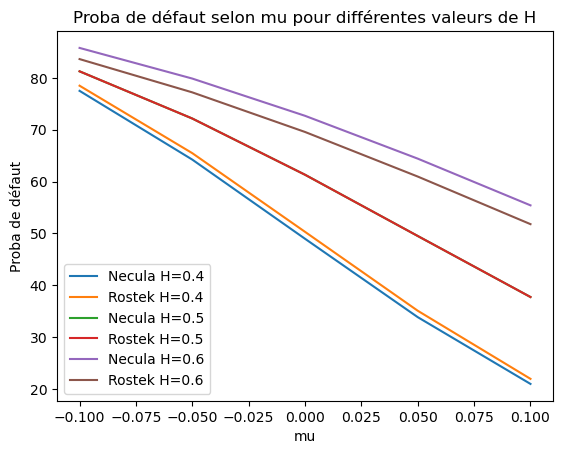

In [140]:
mu_range = [-0.1, -0.05, 0, 0.05, 0.1]

plt.title("Proba de défaut selon mu pour différentes valeurs de H")

H = 0.4
probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for mu in mu_range]
probas_rostek = [proba_rostek(VA, sigma_A, t, T, H, mu) for mu in mu_range]

plt.plot(mu_range, probas_necula, label=f"Necula H={H}")
plt.plot(mu_range, probas_rostek, label=f"Rostek H={H}")

H = 0.5

probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for mu in mu_range]
probas_rostek = [proba_rostek(VA, sigma_A, t, T, H, mu) for mu in mu_range]


plt.plot(mu_range, probas_necula, label=f"Necula H={H}")
plt.plot(mu_range, probas_rostek, label=f"Rostek H={H}")

H = 0.6

probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for mu in mu_range]
probas_rostek = [proba_rostek(VA, sigma_A, t, T, H, mu) for mu in mu_range]

plt.plot(mu_range, probas_necula, label=f"Necula H={H}")
plt.plot(mu_range, probas_rostek, label=f"Rostek H={H}")

plt.xlabel("mu")
plt.ylabel("Proba de défaut")
plt.legend()

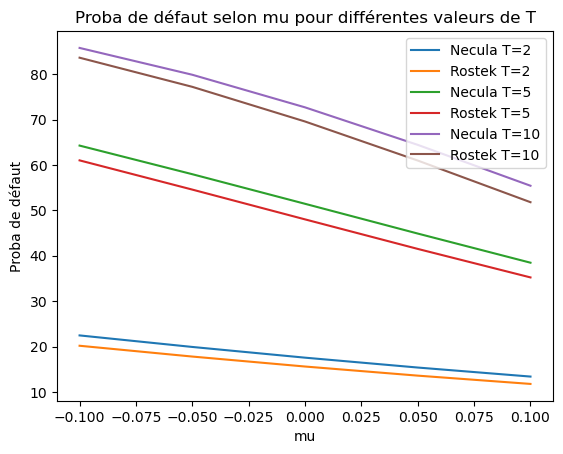

In [141]:
mu_range = [-0.1, -0.05, 0, 0.05, 0.1]

plt.title("Proba de défaut selon mu pour différentes valeurs de T")

T = 2
probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for mu in mu_range]
probas_rostek = [proba_rostek(VA, sigma_A, t, T, H, mu) for mu in mu_range]

plt.plot(mu_range, probas_necula, label=f"Necula T={T}")
plt.plot(mu_range, probas_rostek, label=f"Rostek T={T}")

T = 5

probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for mu in mu_range]
probas_rostek = [proba_rostek(VA, sigma_A, t, T, H, mu) for mu in mu_range]


plt.plot(mu_range, probas_necula, label=f"Necula T={T}")
plt.plot(mu_range, probas_rostek, label=f"Rostek T={T}")

T = 10
probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for mu in mu_range]
probas_rostek = [proba_rostek(VA, sigma_A, t, T, H, mu) for mu in mu_range]

plt.plot(mu_range, probas_necula, label=f"Necula T={T}")
plt.plot(mu_range, probas_rostek, label=f"Rostek T={T}")

plt.xlabel("mu")
plt.ylabel("Proba de défaut")
plt.legend()

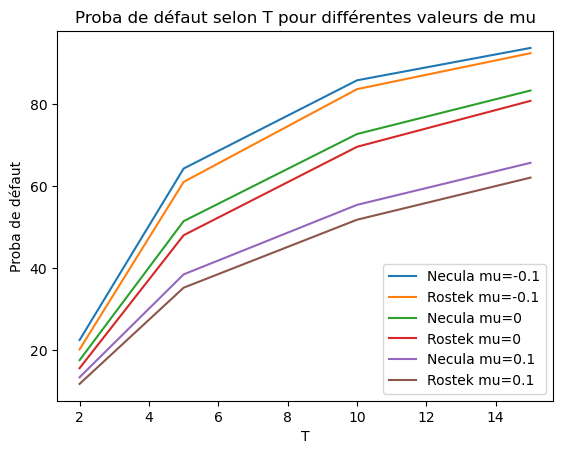

In [143]:
T_range = [2, 5, 10, 15]

plt.title("Proba de défaut selon T pour différentes valeurs de mu")

mu = -0.1
probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for T in T_range]
probas_rostek = [proba_rostek(VA, sigma_A, t, T, H, mu) for T in T_range]

plt.plot(T_range, probas_necula, label=f"Necula mu={mu}")
plt.plot(T_range, probas_rostek, label=f"Rostek mu={mu}")

mu = 0
probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for T in T_range]
probas_rostek = [proba_rostek(VA, sigma_A, t, T, H, mu) for T in T_range]

plt.plot(T_range, probas_necula, label=f"Necula mu={mu}")
plt.plot(T_range, probas_rostek, label=f"Rostek mu={mu}")

mu = 0.1
probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for T in T_range]
probas_rostek = [proba_rostek(VA, sigma_A, t, T, H, mu) for T in T_range]

plt.plot(T_range, probas_necula, label=f"Necula mu={mu}")
plt.plot(T_range, probas_rostek, label=f"Rostek mu={mu}")

plt.xlabel("T")
plt.ylabel("Proba de défaut")
plt.legend()

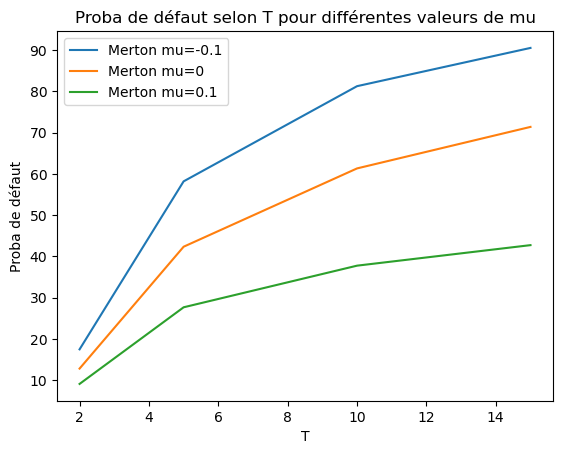

In [144]:
H=0.5

T_range = [2, 5, 10, 15]

plt.title("Proba de défaut selon T pour différentes valeurs de mu")

mu = -0.1
probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for T in T_range]
probas_rostek = [proba_rostek(VA, sigma_A, t, T, H, mu) for T in T_range]

plt.plot(T_range, probas_necula, label=f"Merton mu={mu}")

mu = 0
probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for T in T_range]
probas_rostek = [proba_rostek(VA, sigma_A, t, T, H, mu) for T in T_range]

plt.plot(T_range, probas_necula, label=f"Merton mu={mu}")

mu = 0.1
probas_necula = [proba_necula(VA, sigma_A, t, T, H, mu) for T in T_range]
probas_rostek = [proba_rostek(VA, sigma_A, t, T, H, mu) for T in T_range]

plt.plot(T_range, probas_necula, label=f"Merton mu={mu}")

plt.xlabel("T")
plt.ylabel("Proba de défaut")
plt.legend()